<a href="https://colab.research.google.com/github/leo-alves-melo/busPredictor/blob/master/dumpBusPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating a dump algorithm for bus prediction given the location of the vehicle

In [6]:
# Install dependencies
!pip install arrow

In [0]:
# Importing packages

from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session
import pprint
import json
import pandas as pd
import numpy as np
import arrow
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from functools import reduce
from math import sin, cos, sqrt, atan2, radians
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm
from datetime import timedelta
import copy
from google.colab import files
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [0]:
# Setting variables

base_api = 'https://api.demo.konkerlabs.net'
username = "student_smartcampus@konkerlabs.com"
password = 'SdExnFiHcGrK'

circulino = "3b7c728c-cf13-45ca-a803-d94a598113d0"
circulino1 = "0b525e25-6962-4ee4-8f8a-834e3e33698d"
circulino2 = "8ab6ae21-9d9e-4637-8c56-60ba15691fd2"
circulino3 = "8f4ab4d2-203e-4043-b4b1-bffca39f8686"
circulino4 = "6ce968a1-a32b-4f8c-bc39-4463f50f4591"
circulino5 = "a028f083-8375-45ec-a42f-7e864fd5f8d7"
circulino6 = "eb0ec27f-16d0-4504-a331-af5b1e24eac6"
circulino7 = "826f5fe4-ec9b-4de7-87f8-93be40963612"
circulino8 = "8a33a2fe-8325-4c71-b937-8cc75b85bca4"

# These are the available circulars because the others do not have data
available_circulars = [circulino4, circulino5, circulino6, circulino7, circulino8]

# Coordinates of the home of the circular
latitude_home = -22.829636
longitude_home = -47.061038
home = {'geolocation':{'lat': latitude_home, 'lon': longitude_home}} 

time_formatter1 = '%Y-%m-%dT%H:%M:%S.%fZ'
time_formatter2 = '%Y-%m-%dT%H:%M:%SZ'

bus_stop_latitude = [-22.82961372593675,-22.827572007972478,-22.827839460784613,-22.82572604482161,-22.824259395268815,-22.824342054788538,-22.82339495615896,-22.823696505309023,-22.819732610271284,-22.818471307010142,-22.818031511340962,-22.818063107264045,-22.81897827715408,-22.81851763367064,-22.816911924943703,-22.8149687910257,-22.81348716556454,-22.812519511209437,-22.812994160952606,-22.81423669359395,-22.81654917375286,-22.819294695494193,-22.82167567621637,-22.825048660966733,-22.827383217435795,-22.82880780070171,-22.830572518710206,-22.82966004880576,-22.82961372593675,-22.827572007972478,-22.827839460784613,-22.82572604482161,-22.824234047789606,-22.822700953548658,-22.821469396127068,-22.819146975421376,-22.816566655760123,-22.81417771866976,-22.813895379025784,-22.813831568436914,-22.812777378217994,-22.81348716556454,-22.81504658684353,-22.81561825362484,-22.817031676329528,-22.819334903296923,-22.821000894424408,-22.821312063645497,-22.819994834014597,-22.817413656323698,-22.81471355050243,-22.81566370714975,-22.818063107264045,-22.81826851842413,-22.818182857637566,-22.81834806053481,-22.819694150746503,-22.823807510190303,-22.82486161502456,-22.827383217435795,-22.82880780070171,-22.830572518710206,-22.82966004880576,-22.82961372593675,-22.827572007972478,-22.827839460784613,-22.82572604482161,-22.824234047789606,-22.822700953548658,-22.821469396127068,-22.819146975421376,-22.816566655760123,-22.81417771866976,-22.813895379025784,-22.813831568436914,-22.812777378217994,-22.81348716556454,-22.81504658684353,-22.81561825362484,-22.817031676329528,-22.819334903296923,-22.821000894424408,-22.821312063645497,-22.819994834014597,-22.817413656323698,-22.81471355050243,-22.81466547432292,-22.81404623926024,-22.81348716556454,-22.81566370714975,-22.818063107264045,-22.81826851842413,-22.818182857637566,-22.81834806053481,-22.819694150746503,-22.823807510190303,-22.82486161502456,-22.827383217435795,-22.82880780070171,-22.830572518710206,-22.82966004880576,-22.82961372593675,-22.827572007972478,-22.827839460784613,-22.82572604482161,-22.824234047789606,-22.822700953548658,-22.821469396127068,-22.819146975421376,-22.816566655760123,-22.81417771866976,-22.813895379025784,-22.814990643788022,-22.817031676329528,-22.819334903296923,-22.821000894424408,-22.821312063645497,-22.819994834014597,-22.817413656323698,-22.81471355050243,-22.81566370714975,-22.818063107264045,-22.824468293279722,-22.82486161502456,-22.827383217435795,-22.82880780070171,-22.830572518710206,-22.82966004880576]
bus_stop_longitude = [-47.06137016415596,-47.06275820732117,-47.06677682697773,-47.06618271768093,-47.06345960497856,-47.059839963912964,-47.060167863965034,-47.061488181352615,-47.06003777682781,-47.05960728228092,-47.0604857057333,-47.06308342516422,-47.064886540174484,-47.06610158085823,-47.06609085202217,-47.06696391105652,-47.065243273973465,-47.06756003201008,-47.06950530409813,-47.07185357809061,-47.07285739481449,-47.07241617143154,-47.070336788892746,-47.067298516631126,-47.067575454711914,-47.066226303577366,-47.06210911273956,-47.06069424748421,-47.06137016415596,-47.06275820732117,-47.06677682697773,-47.06618271768093,-47.06772968173027,-47.06905469298363,-47.07022547721863,-47.07222707569599,-47.07261733710766,-47.071487456560135,-47.069668248295784,-47.06821247935295,-47.0677524805069,-47.065243273973465,-47.06436015665531,-47.06585146486759,-47.06623703241348,-47.06711947917938,-47.068121284246445,-47.067411839962006,-47.06532709300518,-47.063652724027634,-47.064024209976196,-47.06265024840826,-47.06308342516422,-47.063074707984924,-47.06050112843508,-47.05967500805855,-47.06013835966587,-47.06294797360897,-47.06547796726227,-47.067575454711914,-47.066226303577366,-47.06210911273956,-47.06069424748421,-47.06137016415596,-47.06275820732117,-47.06677682697773,-47.06618271768093,-47.06772968173027,-47.06905469298363,-47.07022547721863,-47.07222707569599,-47.07261733710766,-47.071487456560135,-47.069668248295784,-47.06821247935295,-47.0677524805069,-47.065243273973465,-47.06436015665531,-47.06585146486759,-47.06623703241348,-47.06711947917938,-47.068121284246445,-47.067411839962006,-47.06532709300518,-47.063652724027634,-47.064024209976196,-47.05708935856819,-47.05889314413065,-47.065243273973465,-47.06265024840826,-47.06308342516422,-47.063074707984924,-47.06050112843508,-47.05967500805855,-47.06013835966587,-47.06294797360897,-47.06547796726227,-47.067575454711914,-47.066226303577366,-47.06210911273956,-47.06069424748421,-47.06137016415596,-47.06275820732117,-47.06677682697773,-47.06618271768093,-47.06772968173027,-47.06905469298363,-47.07022547721863,-47.07222707569599,-47.07261733710766,-47.071487456560135,-47.069668248295784,-47.067154347896576,-47.06623703241348,-47.06711947917938,-47.068121284246445,-47.067411839962006,-47.06532709300518,-47.063652724027634,-47.064024209976196,-47.06265024840826,-47.06308342516422,-47.06490330398077,-47.06547796726227,-47.067575454711914,-47.066226303577366,-47.06210911273956,-47.06069424748421]


In [0]:
# Classes definitions

# Coordinate of a 
class Coordinate():
    def __init__(self, latitude, longitude, timestamp = None, id_line = None, guid = None):
        self.latitude = latitude
        self.longitude = longitude
        self.timestamp = timestamp
        self.id_line = id_line
        self.device_guid = guid
    
    def from_coordinate(coordinate):
        return Coordinate(coordinate.latitude, coordinate.longitude, coordinate.timestamp, coordinate.id_line, coordinate.device_guid)
        
class Path():
    def __init__(self, coordinates, id_line):
        self.coordinates = coordinates
        self.id_line = id_line
        
class Predictor():
    def __init__(self, algorithm):
        self.algorithm = algorithm
        self.next_path()
        
    def train(self, X, y):
        self.algorithm.fit(np.array(X), np.array(y))
    
    def next_path(self):
        self.reset_path()
        
    def reset_path(self):
        self.path = []
    
    def iterate(self, coordinate):
        self.path.append(coordinate)
        return self.algorithm.predict(np.array(self.path))
    
class DumpAlgorithm():
    def fit(self, X, y):
        pass
    
    def predict(self, path):
        musium_hot_point = Coordinate(-22.814127, -47.058833)
        circular1_hot_point = Coordinate(-22.824493, -47.059594)
        fec_hot_point = Coordinate(-22.817975, -47.059667)

        if has_distance_from_coordinate(path, musium_hot_point, 0.3):
            return 4
        if has_distance_from_coordinate(path, circular1_hot_point, 0.25):
            return 1
        if has_distance_from_coordinate(path, fec_hot_point, 0.25):
            return 2

        return 3

# Bayes algorithm fits the model for 350 positions, 
# which means almost 1h oh bus travel
# Max size of all columns
max_column = 350
class BayesAlgorithm():
    def fit(self, X, y):

        train = []
        response = []
        
        for index_line in range(len(X)):
            for index_column in range(max_column):
                
                train_sample = X[index_line][0:index_column+1]
                train_sample = np.array(reduce(list.__add__, train_sample))
                appended = np.zeros(3*max_column - len(train_sample))
                
                train_sample = np.append(train_sample, appended)
                
                train.append(np.array(train_sample))
                response.append(y[index_line])
        
        train = np.array(train)
        response = np.array(response)
        
        self.model = GaussianNB().fit(pd.DataFrame(train), pd.DataFrame(response))
    
    def predict(self, path):
        
        train_sample = path.flatten()
        appended = np.zeros(3*max_column - len(train_sample))

        sample = np.append(np.array(path), appended)
        return self.model.predict(np.array(sample).reshape(1, -1))[0]
        

In [0]:
# Data Collector Functions

def get_data(guid):
    global oauth
    
    print('coletando: ' + guid)
    
    dt_start = arrow.utcnow().to('America/Sao_Paulo').floor('day')
    timestamp_init = dt_start.shift(days=-7).isoformat()
    channel = 'info'
    timestamp_final = arrow.utcnow().isoformat()
    application = 'default'
    result = []
    lastlen = 0
    while timestamp_init < timestamp_final:
        try:
            stats = oauth.get("https://api.demo.konkerlabs.net/v1/{}/incomingEvents?q=device:{} channel:{} timestamp:>{}&sort=oldest&limit=10000".format(application,guid, channel, timestamp_init)).json()['result']
            if (len(stats)<2) and (lastlen<20000):
                break
            timestamp_init = stats[-1]['timestamp']
            result.extend(stats)
            lastlen = len(stats)
        except:
            pass
    return result

def download_data(data):
    with open('data.json', 'w') as file:
        file.write(json.dumps(data))

    files.download('data.json')

In [0]:
# Data Filter Functions

# Calculates the distance in km
def distance_between(position1, position2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(position1.latitude)
    lon1 = radians(position1.longitude)
    lat2 = radians(position2.latitude)
    lon2 = radians(position2.longitude)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    
    return distance

# Calculates the distance in km
def distance_between_literal(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0
    
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    
    return distance

def collect_time(timestamp):
    try:
        return datetime.strptime(timestamp, time_formatter1)
    except:
        return datetime.strptime(timestamp, time_formatter2)

# Calculates the velocity in km/h
def velocity_between(position1, position2):
    
    distance = distance_between(position1, position2)
    
    time1 = collect_time(position1.timestamp)
        
    time2 = collect_time(position2.timestamp)
    
    time_delta = (time2 - time1).total_seconds()/3600
    
    if time_delta == 0:
        return 0

    return distance/time_delta

def has_distance_from_home(path, distance = 1):
    return any(distance_between(position, home) < distance for position in path)

def has_distance_greater_from_home(path, distance = 1):
    return any(distance_between(position, home) > distance for position in path)

def has_distance_from_coordinate(path, coordinate, distance = 1):

    return any(distance_between_literal(position[1], position[2], coordinate.latitude, coordinate.longitude) < distance for position in path)

def parse_coordinate(json):
    try:
        return Coordinate(json['geolocation']['lat'], 
                          json['geolocation']['lon'], 
                          json['timestamp'], 
                          json['payload']['id_linha'], 
                          json['incoming']['deviceGuid'])
    except:
        return Coordinate(json['geolocation']['lat'], 
                          json['geolocation']['lon'])

# Append the next coordenate if it is valid. Returns false when the path ended
def validate_and_append_next_coordinate(coordinate, path): 
    
    # Checks if it is the first coordinate of the path
    if len(path) == 0:
        
        # Check if is close to the home, and if is, append the coordinate
        if distance_between(coordinate, home) < 0.1:
            return True, [coordinate]
        else:
            return True, []
    
    # Check if is duplicated
    if coordinate == path[-1]:
        return True, path
    
    # Checks if the velocity of the next coordinate is too big or greater than zero
    if velocity_between(coordinate, path[-1]) > 100 and velocity_between(coordinate, path[-1]) > 0:
        return True, path
    
    # Checks the time difference
    try:
        time1 = datetime.strptime(path[-1].timestamp, time_formatter1)
    except:
        time1 = datetime.strptime(path[-1].timestamp, time_formatter2)
        
    try:
        time2 = datetime.strptime(coordinate.timestamp, time_formatter1)
    except:
        time2 = datetime.strptime(coordinate.timestamp, time_formatter2)
        
    if (time2 - time1).total_seconds() > 5*60:
        return False, path
    
    # Checks the id
    if coordinate.id_line != path[-1].id_line:
        return False, path
    
    # Check if the path have at least one coordinate far away from the home, so that the path started
    biggest_distance = 0
    for path_coordinate in path:
        if distance_between(path_coordinate, home) > biggest_distance:
            biggest_distance = distance_between(path_coordinate, home)
    
    # If the path already started
    if biggest_distance > 1:
        # If we are close to home
        if distance_between(coordinate, home) < 0.1:
            return False, path + [coordinate]
        else:
            return True, path + [coordinate]
    else:
        return True, path + [coordinate]
    
def create_paths(data):
    paths = [[]]
    index = 0
    count = 0
    count_int = 0
    total = len(data)
    for json in data:
        coordinate = parse_coordinate(json)
        count += 1
        if 100*count/total > count_int + 1:
            count_int += 1

            print(str(count_int) + "%", end=' - ')
        still_appending, paths[index] = validate_and_append_next_coordinate(coordinate, paths[index])
        if not still_appending:
            # If there is few values on the path, we can discart it
            if len(paths[index]) < 105:
                paths[index] = []
            else:
                if has_distance_from_home(paths[index]):
                    if has_distance_greater_from_home(paths[index]):
                        index += 1
                        paths.append([])
                    else:
                        paths[index] = []
                else:
                    paths[index] = []
        elif count == len(data):
            paths.pop(index)
            
                        
    return paths

In [0]:
# Data Visualization

def plot_path(path):

    latitudes = [coordinate.latitude for coordinate in path]
    longitudes = [coordinate.longitude for coordinate in path]
    
    numberOfDots = len(path)
    colors = cm.rainbow(np.linspace(0, 1, numberOfDots))
    
    plt.margins(0) # Fit the map in the image
    
    plt.scatter(longitudes, latitudes, color=colors)
    
    plt.scatter(bus_stop_longitude, bus_stop_latitude, marker='*')
        
    plt.show()

def plot_correctness(correctness):
    plt.plot(range(len(correctness)), correctness)
    plt.ylabel('Porcentagem')
    plt.xlabel('# Leituras')
    plt.title('Porcentagem de acerto por # de leituras')
    plt.grid(True)
    plt.show()

In [0]:
# Data Processing Functions

def average_window(window):
    latitude_sum = reduce(lambda summation, coordinate: summation + coordinate.latitude, window, 0)
    longitude_sum = reduce(lambda summation, coordinate: summation + coordinate.longitude, window, 0)
    
    latitude_avg = latitude_sum/len(window)
    longitude_avg = longitude_sum/len(window)
    
    coordinate_avg = Coordinate.from_coordinate(window[0])
    coordinate_avg.latitude = latitude_avg
    coordinate_avg.longitude = longitude_avg
    
    return coordinate_avg
    
def apply_average_window_on_path(path, window_size = 10, window_shift = 2):
    index = 0
    new_path = []
    while index < len(path):
        window = path[index:index + window_size]
        new_coordinate = average_window(window)
        new_path.append(new_coordinate)
        index += window_shift
        
    return new_path

def apply_average_time_window(path, window_time = 10, window_time_shift = 2):
    index = 0
    new_path = []
    initial_time = collect_time(path[0].timestamp)
    
    while index < len(path):
        
        window = []
        while index < len(path) and collect_time(path[index].timestamp) < initial_time + timedelta(seconds=window_time):
            window.append(path[index])
            index += 1
            
        initial_time += timedelta(seconds=window_time)
        
        if len(window) > 0:
            average = average_window(window)
            
            new_path.append(average)
            
        
    return new_path

def separate_X_coordinate(coordinate, first_time):
    current_time = collect_time(coordinate.timestamp)
    difference_time = (current_time - first_time).total_seconds() 
    return [difference_time, coordinate.latitude, coordinate.longitude]

def separate_Y_id_line(path):
    return path[0].id_line

def separate_X_paths(paths):
    X = []
    for path in paths:
        first_time = collect_time(path[0].timestamp)
        X.append(list(map(lambda coordinate: separate_X_coordinate(coordinate, first_time), path)))
        
    return X

def separate_Y_paths(paths):
    Y = []
    for path in paths:
        Y.append(separate_Y_id_line(path))
        
    return Y     

def separate_train_test(paths):
    all_X = separate_X_paths(paths) 
    all_y = separate_Y_paths(paths)
    
    X_train, X_test, y_train, y_test = train_test_split(all_X, all_y, random_state=1, test_size=0.2, stratify=all_y)
    
    return X_train, X_test, y_train, y_test

In [0]:
# Algorithm Functions
def predict_X(X, predictor):
    predicteds = []
    
    for path in X:

        predicted = []
        
        predictor.next_path()
        for coordinate in path:
            predicted.append(predictor.iterate(coordinate))
        
        predicteds.append(predicted)
    
    return predicteds

def predict(paths, predictor):
    #X_train, X_test, y_train, y_test = separate_train_test(paths)
    
    X = separate_X_paths(paths) 
    y = separate_Y_paths(paths)
    
    prediction_paths = []
    #predictor = Predictor(algorithm)
    #predictor.train(X_train, y_train)
    for path in X:

        prediction_path = []
        
        predictor.next_path()
        for coordinate in path:
            prediction_path.append(predictor.iterate(coordinate))
        
        prediction_paths.append(prediction_path)
    
    return prediction_paths, y

def anilyze_prediction(prediction, y):
    # Parses every value of the prediction to a boolean matching the correct response of y
    correctness = []
    max_column = 0
    for index in range(len(y)):
        correctness.append([])
        current_column = 0
        for predict in prediction[index]:
            correctness[index].append(predict == y[index])
            current_column += 1
            if current_column > max_column:
                max_column = current_column

    # Sum the correctness of every column to analyze the correctness per value readed
    correct_number_column = []
    for column in range(max_column):
        correct_number = 0
        number_of_read = 0
        for line in range(len(correctness)):
            
            try: 
                
                if correctness[line][column]:
                    correct_number += 1
                number_of_read += 1
            except:
                pass
        
        correct_number_column.append(correct_number *100 / number_of_read)
    return correct_number_column

In [0]:
# Authenticating

client = BackendApplicationClient(client_id=username)
oauth = OAuth2Session(client=client)
token = oauth.fetch_token(token_url='{}/v1/oauth/token'.format(base_api),client_id=username,client_secret=password)

In [16]:
# Reading all circular data

data = []
home = Coordinate(latitude_home, longitude_home)
for circular in available_circulars:
    data += get_data(circular)

coletando: 6ce968a1-a32b-4f8c-bc39-4463f50f4591
coletando: a028f083-8375-45ec-a42f-7e864fd5f8d7
coletando: eb0ec27f-16d0-4504-a331-af5b1e24eac6
coletando: 826f5fe4-ec9b-4de7-87f8-93be40963612
coletando: 8a33a2fe-8325-4c71-b937-8cc75b85bca4


In [17]:
data[0]

{'geolocation': {'elev': 622.5, 'lat': -22.82917, 'lon': -47.060447},
 'incoming': {'channel': 'info',
  'deviceGuid': '6ce968a1-a32b-4f8c-bc39-4463f50f4591'},
 'ingestedTimestamp': '2019-04-09T09:43:12.007Z',
 'payload': {'_elev': 622.5,
  '_lat': -22.82917,
  '_lon': -47.060447,
  '_pdop': 1.7,
  'hora_coletado': '2019-04-09 06:43:01',
  'id_linha': 2,
  'numero_satelites': 5,
  'sinal': 11,
  'temperatura': 20.04,
  'velocidade_media_gps': 19.54},
 'timestamp': '2019-04-09T09:43:12.007Z'}

In [0]:
# Getting all possible id_linha

#id_lines = {}
#for json in data:
#    id_line = json.id_line
#    if id_line in id_lines:
#        id_lines[id_line] += 1
#    else:
#        id_lines[id_line] = 1
#
#print(id_lines)

In [19]:
paths = create_paths(data)

1% - 2% - 3% - 4% - 5% - 6% - 7% - 8% - 9% - 10% - 11% - 12% - 13% - 14% - 15% - 16% - 17% - 18% - 19% - 20% - 21% - 22% - 23% - 24% - 25% - 26% - 27% - 28% - 29% - 30% - 31% - 32% - 33% - 34% - 35% - 36% - 37% - 38% - 39% - 40% - 41% - 42% - 43% - 44% - 45% - 46% - 47% - 48% - 49% - 50% - 51% - 52% - 53% - 54% - 55% - 56% - 57% - 58% - 59% - 60% - 61% - 62% - 63% - 64% - 65% - 66% - 67% - 68% - 69% - 70% - 71% - 72% - 73% - 74% - 75% - 76% - 77% - 78% - 79% - 80% - 81% - 82% - 83% - 84% - 85% - 86% - 87% - 88% - 89% - 90% - 91% - 92% - 93% - 94% - 95% - 96% - 97% - 98% - 99% - 

In [0]:
#for i in range(len(paths)):
#    print('iteration: ' + str(i) + ' - id: ' + str(paths[i][0].id_line))
#    plot_path(paths[i])

In [0]:
#paths_avg = []
#for path in paths:
#    paths_avg.append(apply_average_window_on_path(path))

In [0]:
#for i in range(len(paths_avg)):
#    print('iteration: ' + str(i) + ' - id: ' + str(paths_avg[i][0].id_line))
#    plot_path(paths_avg[i])

In [0]:
paths_avg = []
for path in paths:
    paths_avg.append(apply_average_time_window(path))

In [0]:
#for i in range(len(paths_avg)):
#    print('iteration: ' + str(i) + ' - id: ' + str(paths_avg[i][0].id_line))
#    plot_path(paths_avg[i])

In [0]:
# Use: https://www.mapcustomizer.com/#bulkEntryModal
#for coordinate in paths[385]:
#    print(coordinate.latitude, coordinate.longitude)
#has_distance_greater_from_home(paths[368])
#paths.pop(385)
#pass

In [0]:
# Getting all possible id_linha in paths

#id_lines = {}
#for path in paths:
#    id_line = path[0].id_line
#    if id_line in id_lines:
#        id_lines[id_line] += 1
#    else:
#        id_lines[id_line] = 1
#
#print(id_lines)

In [0]:
#numbers_id = {1:0, 2:0, 3:0, 4:0}
#for path in paths:
#    id_line = path[0].id_line
#    start_time = collect_time(path[0].timestamp)
#    stop_time = collect_time(path[-1].timestamp)
#    
#    numbers_id[id_line] += len(path)/(stop_time - start_time).total_seconds() 
#    
#numbers_id[1] /= id_lines[1]
#numbers_id[2] /= id_lines[2]
#numbers_id[3] /= id_lines[3]
#numbers_id[4] /= id_lines[4]
#
#print(numbers_id)
#      

In [0]:
# Getting all possible device id
#quantity_and_value = {'quantity': 0, 'value': 0}
#numbers_id = {1: quantity_and_value.copy(), 2: quantity_and_value.copy(), 3: quantity_and_value.copy(), 4: quantity_and_value.copy()}
#id_devices = {circulino4: copy.deepcopy(numbers_id), circulino5: copy.deepcopy(numbers_id), circulino6: copy.deepcopy(numbers_id), circulino7: copy.deepcopy(numbers_id), circulino8: copy.deepcopy(numbers_id)}
#for path in paths:
#    id_device = path[0].device_guid
#    id_line = path[0].id_line
#    start_time = collect_time(path[0].timestamp)
#    stop_time = collect_time(path[-1].timestamp)
#    
#    id_devices[id_device][id_line]['value'] += len(path)/(stop_time - start_time).total_seconds() 
#    id_devices[id_device][id_line]['quantity'] += 1
#    
#for id_device in available_circulars:
#    
#    if id_devices[id_device][1]['quantity'] > 0:
#        id_devices[id_device][1]['value'] /= id_devices[id_device][1]['quantity']
#    if id_devices[id_device][2]['quantity'] > 0:
#        id_devices[id_device][2]['value'] /= id_devices[id_device][2]['quantity']
#    if id_devices[id_device][3]['quantity'] > 0:
#        id_devices[id_device][3]['value'] /= id_devices[id_device][3]['quantity']
#    if id_devices[id_device][4]['quantity'] > 0:
#        id_devices[id_device][4]['value'] /= id_devices[id_device][4]['quantity']
#
#print(id_devices)

In [0]:
#X_train, X_test, y_train, y_test = separate_train_test(paths)
#musium_hot_point = Coordinate(-22.814127, -47.058833)
#circular1_hot_point = Coordinate(-22.824493, -47.059594)
#fec_hot_point = Coordinate(-22.817975, -47.059667)
#index = 12
#current_path = all_X = separate_X_paths([paths[index]])[0] 
#
#if has_distance_from_coordinate(current_path, musium_hot_point, 0.3):
#    print(4)
#if has_distance_from_coordinate(current_path, circular1_hot_point, 0.25):
#    print(1)
#if has_distance_from_coordinate(current_path, fec_hot_point, 0.25):
#    print(2)
#
#print(3)
#

In [0]:
#has_distande_from()

In [0]:
predictor = Predictor(DumpAlgorithm())
prediction, y = predict(paths_avg, predictor)

In [0]:

correctness = anilyze_prediction(prediction, y)


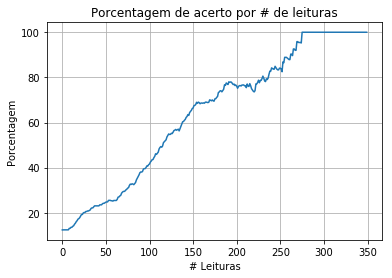

In [33]:
plot_correctness(correctness)

In [94]:
predictor = Predictor(BayesAlgorithm())
X_train, X_test, y_train, y_test = separate_train_test(paths_avg)
predictor.train(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
prediction = predict_X(X_test, predictor)


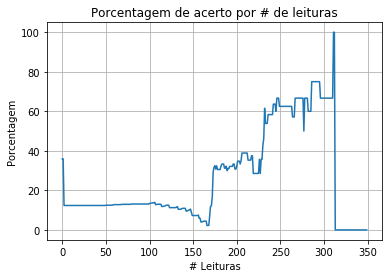

In [100]:
correctness = anilyze_prediction(prediction, y_test)
plot_correctness(correctness)